## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [13]:
train_df = pd.read_csv("train_data.csv")
x_train = train_df['x_train'].to_numpy().reshape(-1,1)
y_train = train_df['y_train'].to_numpy().reshape(-1,1)

test_df = pd.read_csv("test_data.csv")
x_test = test_df['x_test'].to_numpy().reshape(-1,1)
y_test = test_df['y_test'].to_numpy().reshape(-1,1)

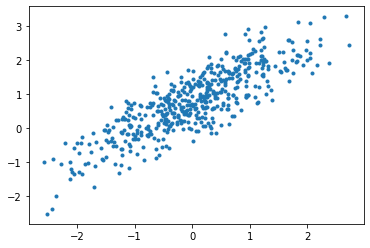

In [14]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class LinearRegression():
    def __init__(self, learning_rate=0.001, batch_size=32, n_epochs=100):
        self.lr = learning_rate
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.loss_history = []

    def fit(self, X, y):
        self.beta0 = np.random.rand(X.shape[1])
        self.beta1 = np.random.rand(1)
        for epoch in range(self.n_epochs):
            loss = 0
            for i in range(0, len(X), self.batch_size):
                # Get batch data
                x_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]

                # Get preidction & Loss
                y_pred = (x_batch*self.beta0) + self.beta1
                loss = y_pred - y_batch

                # Calculate gradient
                gradient_beta0 = 2*np.sum(x_batch * loss) / len(x_batch)
                gradient_beta1 = 2*np.sum(loss) / len(x_batch)

                # Update weights
                self.beta0 = self.beta0 - self.lr*gradient_beta0
                self.beta1 = self.beta1 - self.lr*gradient_beta1
                self.loss_history.append(self.MSE(y_pred, y_batch))

    def MSE(self, x, y):
        mse = np.mean((x-y) ** 2)
        return mse

    def predict(self, x):
        prediction = x * self.beta0 + self.beta1
        return prediction

    def plot_learning_curve(self):
        plt.plot(np.arange(self.n_epochs), self.loss_history)
        plt.show()


In [87]:
lr_model = LinearRegression(learning_rate=0.01, batch_size=len(x_train), n_epochs=500)

In [88]:
lr_model.fit(x_train, y_train)

In [89]:
print("Beta_0:", lr_model.beta0)
print("Beta_1:", lr_model.beta1)

Beta_0: [0.81794775]
Beta_1: [0.78457085]


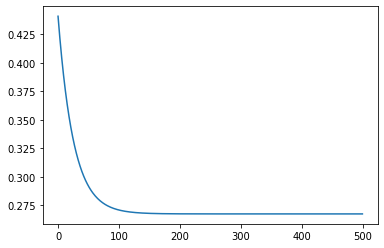

In [90]:
lr_model.plot_learning_curve()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [91]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [92]:
y_pred = lr_model.predict(x_test)

In [93]:
print("MSE of test data:", lr_model.MSE(y_test, y_pred))

MSE of test data: 0.06870623174970676


## Short answer questions

![](./Question1.jpg)  

![](./Question2.png)